# ===============================================
# EDUCATION & ECONOMY PROJECT
# ===============================================

# 📘 Project Overview: Education & Economy

## 🎯 Goal
This project explores the relationship between **education** and **economic development** across different countries.  
It investigates how investments in education and university availability correlate with economic indicators such as **GDP per capita**.

---

## 🌍 Countries Analyzed
To ensure diversity and comparability, the analysis includes the **10 largest global economies** and **Kazakhstan** as a developing economy example:  

> United States, China, Japan, Germany, India, United Kingdom, France, Brazil, Canada, South Korea, **Kazakhstan**

---

## 🧠 Data Sources

### 1. World Bank API  
Provides global indicators such as:

- **GDP per capita (NY.GDP.PCAP.CD)** — GDP per capita (current US$)  
- **Education expenditure (% of GDP) (SE.XPD.TOTL.GD.ZS)** — Government expenditure on education as % of GDP  
- **School enrollment, tertiary (% gross) (SE.TER.ENRR)** — Tertiary education enrollment rate (% gross)  
- **Total population (SP.POP.TOTL)** — Total population  
- **GDP growth (annual %) (NY.GDP.MKTP.KD.ZG)** — Annual percentage growth rate of GDP  
- **R&D expenditure (% of GDP) (GB.XPD.RSDV.GD.ZS)** — Research and development expenditure as % of GDP  
- **Poverty rate (% of population living on < $2.15/day) (SI.POV.DDAY)** — Poverty headcount ratio  
- **School enrollment, secondary (% gross) (SE.SEC.ENRR)** — Secondary education enrollment rate (% gross)

### 2. Web sites (https://www.flagpictures.com, https://www.topuniversities.com/world-university-rankings/2021)
- **Number of universities per country**  
- **Top 100 universities in the world** 


# Imports

In [ ]:
import time
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re

# Extracting data from WorldBank API

The World Bank API allows users to access various datasets and indicators related to global development. Users can retrieve data on a wide range of topics such as education, health, poverty, and environment.

# Constants

In [80]:
COUNTRIES = ["USA", "CHN", "JPN", "DEU", "IND", "GBR", "FRA", "ITA", "BRA", "CAN", "KAZ"]

INDICATORS = {
    "NY.GDP.PCAP.CD": "gdp_per_capita",               # GDP per capita (current US$)
    "SE.XPD.TOTL.GD.ZS": "edu_expenditure_pct_gdp",   # Government expenditure on education (% of GDP)
    "SE.TER.ENRR": "tertiary_enrollment",             # School enrollment, tertiary (% gross)
    "SP.POP.TOTL": "population",                      # Total population
    "NY.GDP.MKTP.KD.ZG": "gdp_growth",                # GDP growth (annual %)
    "GB.XPD.RSDV.GD.ZS": "rnd_expenditure_pct_gdp",   # Research and development expenditure (% of GDP)
    "SI.POV.DDAY": "poverty_rate",                    # Poverty headcount ratio at $2.15/day (% of population)
    "SE.SEC.ENRR": "secondary_enrollment"             # School enrollment, secondary (% gross)
}
YEAR = "2021"

params = {
    "format": "json",
    "date": YEAR 
}


BASE_URL = "https://api.worldbank.org/v2/country/{country}/indicator/{indicator}"

# Parsing

In [82]:
results = []

for country in COUNTRIES:
    country_data = {"country_code": country, "year": YEAR}
    for indicator, name in INDICATORS.items():
        url = BASE_URL.format(country=country, indicator=indicator)
        try:
            response = requests.get(url, params=params)#request to World Bank API
            if response.status_code != 200:
                print(f"HTTP {response.status_code} for {country}, {indicator}")
                country_data[name] = None
                continue
            else:#data extraction
                data = response.json()
                value = data[1][0].get("value")
                country_name = data[1][0]["country"]["value"]
                country_data["country"] = country_name
                country_data[name] = value
        except Exception as e:
            print(f" Error for {country}, {indicator}: {e}")
            country_data[name] = None
        time.sleep(0.1) # rate limiting
    results.append(country_data)
    
    
df = pd.DataFrame(results).set_index("country_code")
df


,year,country,gdp_per_capita,edu_expenditure_pct_gdp,tertiary_enrollment,population,gdp_growth,rnd_expenditure_pct_gdp,poverty_rate,secondary_enrollment
country_code,,,,,,,,,,
USA,2021,United States,71307.401728,5.420380,84.855087,332099760,6.055053,3.48313,0.5,101.192490
CHN,2021,China,12887.435724,NaN,66.818608,1412360000,8.570085,2.43260,0.0,NaN
JPN,2021,Japan,40094.559980,3.335640,63.170269,125681593,2.696574,3.27677,NaN,102.155380
DEU,2021,Germany,52265.654162,5.367340,75.665543,83196078,3.670000,3.12882,NaN,101.203537
IND,2021,India,2239.613844,4.629500,31.317102,1414203896,9.689592,NaN,NaN,80.835572
GBR,2021,United Kingdom,46926.475736,5.906830,76.717491,66984000,8.575951,2.89711,0.5,113.681282
FRA,2021,France,43725.099952,5.417430,69.939789,67842811,6.882338,2.21808,0.1,104.522842
ITA,2021,Italy,36852.542541,4.171190,71.274521,59133173,8.931062,1.42658,0.9,101.834869
BRA,2021,Brazil,7972.536650,5.496980,56.830620,209550294,4.762604,NaN,7.5,106.651894


# Data cleaning


In [83]:
df.describe()
df2 = df.copy()
df2.describe()

,gdp_per_capita,edu_expenditure_pct_gdp,tertiary_enrollment,population,gdp_growth,rnd_expenditure_pct_gdp,poverty_rate,secondary_enrollment
count,11.000000,10.000000,11.000000,1.100000e+01,11.000000,9.000000,8.000000,10.000000
mean,34285.598454,4.887958,66.885427,3.480941e+08,6.371253,2.317514,1.212500,101.472573
std,22576.350177,0.779214,14.585723,5.341560e+08,2.355326,1.065333,2.559262,8.883419
min,2239.613844,3.335640,31.317102,1.974360e+07,2.696574,0.130230,0.000000,80.835572
25%,11435.518380,4.446645,61.277605,6.305859e+07,4.531302,1.864310,0.075000,101.195251
50%,40094.559980,5.057970,69.939789,8.319608e+07,6.055053,2.432600,0.350000,101.995125
75%,49596.064949,5.419643,76.191517,2.708250e+08,8.573018,3.128820,0.600000,106.119631
max,71307.401728,5.906830,84.855087,1.414204e+09,9.689592,3.483130,7.500000,113.681282


In [84]:
df2 = df2.rename(columns={
    "gdp_per_capita": "gdp_per_capita($)",
    "edu_expenditure_pct_gdp": "education_expenditure(%GDP)",
    "tertiary_enrollment": "tertiary_enrollment(%)",
    "population": "population(people)",
    "gdp_growth": "gdp_growth(%)",
    "rnd_expenditure_pct_gdp": "rnd_expenditure(%GDP)",
    "poverty_rate": "poverty_rate(%)",
    "secondary_enrollment": "secondary_enrollment(%)"
})
df2["education_expenditure(%GDP)"] = df2["education_expenditure(%GDP)"].fillna(df2["education_expenditure(%GDP)"].mean())
df2["tertiary_enrollment(%)"] = df2["tertiary_enrollment(%)"].fillna(df2["tertiary_enrollment(%)"].median())
df2["secondary_enrollment(%)"] = df2["secondary_enrollment(%)"].fillna(df2["secondary_enrollment(%)"].median())
df2["poverty_rate(%)"] = df2["poverty_rate(%)"].replace(0, np.nan)
df2["poverty_rate(%)"] = df2["poverty_rate(%)"].fillna(df2["poverty_rate(%)"].median())
display(df2)

,year,country,gdp_per_capita($),education_expenditure(%GDP),tertiary_enrollment(%),population(people),gdp_growth(%),rnd_expenditure(%GDP),poverty_rate(%),secondary_enrollment(%)
country_code,,,,,,,,,,
USA,2021,United States,71307.401728,5.420380,84.855087,332099760,6.055053,3.48313,0.5,101.192490
CHN,2021,China,12887.435724,4.887958,66.818608,1412360000,8.570085,2.43260,0.5,101.995125
JPN,2021,Japan,40094.559980,3.335640,63.170269,125681593,2.696574,3.27677,0.5,102.155380
DEU,2021,Germany,52265.654162,5.367340,75.665543,83196078,3.670000,3.12882,0.5,101.203537
IND,2021,India,2239.613844,4.629500,31.317102,1414203896,9.689592,NaN,0.5,80.835572
GBR,2021,United Kingdom,46926.475736,5.906830,76.717491,66984000,8.575951,2.89711,0.5,113.681282
FRA,2021,France,43725.099952,5.417430,69.939789,67842811,6.882338,2.21808,0.1,104.522842
ITA,2021,Italy,36852.542541,4.171190,71.274521,59133173,8.931062,1.42658,0.9,101.834869
BRA,2021,Brazil,7972.536650,5.496980,56.830620,209550294,4.762604,NaN,7.5,106.651894


In [ ]:
mean_gdp = df["gdp_per_capita"].mean()
median_gdp = df["gdp_per_capita"].median()
print(mean_gdp, median_gdp)


34285.59845362774 40094.5599795288


# Extracting data from Websites()



# Constants

In [52]:
countries_full = [
    "united states",
    "china",
    "japan",
    "germany",
    "india",
    "united kingdom",
    "france",
    "italy",
    "brazil",
    "canada",
    "kazakhstan"
]

headers = {"User-Agent": "Mozilla/5.0 (Edu-Demo; WebScraping101)"}

items_per_page=100 #shows top 100 world universities


WEB_URL_COUNT_UNIVERSITIES = "https://www.flagpictures.com/country-flags/{country_name}"
WEB_URL_TOP_100_UNIVERSITIES = "https://www.topuniversities.com/world-university-rankings/2021?items_per_page=100&sort_by=rank&order_by=asc"

# Parsing
Count of universities per country

In [31]:
data_count_universities = []
for country in countries_full:
    url = WEB_URL_COUNT_UNIVERSITIES.format(country_name=country.replace(" ", "-"))
    try:
        response = requests.get(url, headers=headers, timeout=20, verify=False)
        if response.status_code != 200:
            print(f"HTTP {response.status_code} for {country}")
            data.append({"country": country, "num_universities": None})
            continue
        soup = BeautifulSoup(response.text, "html.parser")
        uni_info = soup.select("table.country-info tr td")[-7].get_text(strip=True).split()[0] # get the number of universities
        if uni_info:
            num_universities = int(uni_info)
            data_count_universities.append({"country": country, "num_universities": num_universities})
        else:
            print(f"University info not found for {country}")
            data_count_universities.append({"country": country, "num_universities": None})
    except Exception as e:
        print(f" Error for {country}: {e}")
        data_count_universities.append({"country": country, "num_universities": None})
    time.sleep(0.1)  # rate limiting
print(data_count_universities)

[{'country': 'united states', 'num_universities': 3216}, {'country': 'china', 'num_universities': 2565}, {'country': 'japan', 'num_universities': 1003}, {'country': 'germany', 'num_universities': 459}, {'country': 'india', 'num_universities': 5288}, {'country': 'united kingdom', 'num_universities': 280}, {'country': 'france', 'num_universities': 617}, {'country': 'italy', 'num_universities': 239}, {'country': 'brazil', 'num_universities': 1297}, {'country': 'canada', 'num_universities': 387}, {'country': 'kazakhstan', 'num_universities': 134}]


Top 100 universities in the world

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

# instantiate options for Chrome

def fetch_data(country):
    options = webdriver.ChromeOptions()

# run the browser in headless mode
    options.add_argument("--headless=new")

# instantiate Chrome WebDriver with options
    driver = webdriver.Chrome(options=options)

# open the specified URL in the browser
    driver.get(WEB_URL_TOP_100_UNIVERSITIES)
    

    products = driver.find_elements(By.CLASS_NAME, "location")

    count_top_100 = sum(country in p.text.lower() for p in products)
    
    # close the browser
    driver.quit()

    return {"country": country, "top100_universities": count_top_100}


In [75]:
from selenium import webdriver
from selenium.webdriver.common.by import By



data_top_100_universities = []
options = webdriver.ChromeOptions()

# run the browser in headless mode
options.add_argument("--headless=new")

# instantiate Chrome WebDriver with options
driver = webdriver.Chrome(options=options)

# open the specified URL in the browser
driver.get(WEB_URL_TOP_100_UNIVERSITIES)
    
locations = driver.find_elements(By.CLASS_NAME, "location")

for country in countries_full:
    try:
        count_top_100 = sum(country in p.text.lower() for p in locations)
        data_top_100_universities.append({"country": country, "top100_universities": count_top_100})
    except Exception as e:
        print(f" Error for {country}: {e}")
        data_top_100_universities.append({"country": country, "top100_universities": None})
print(data_top_100_universities)

driver.quit()





[{'country': 'united states', 'top100_universities': 27}, {'country': 'china', 'top100_universities': 6}, {'country': 'japan', 'top100_universities': 5}, {'country': 'germany', 'top100_universities': 3}, {'country': 'india', 'top100_universities': 0}, {'country': 'united kingdom', 'top100_universities': 18}, {'country': 'france', 'top100_universities': 3}, {'country': 'italy', 'top100_universities': 0}, {'country': 'brazil', 'top100_universities': 0}, {'country': 'canada', 'top100_universities': 3}, {'country': 'kazakhstan', 'top100_universities': 0}]


# Data preporation

In [95]:
pip install pycountry

   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.3 MB ? eta -:--:--
   --- ------------------------------------ 0.5/6.3 MB 737.1 kB/s eta 0:00:08
   ---- ----------------------------------- 0.8/6.3 MB 821.6 kB/s eta 0:00:07
   ------ --------------------------------- 1.0/6.3 MB 884.6 kB/s eta 0:00:06
   ------ --------------------------------- 1.0/6.3 MB 884.6 kB/s eta 0:00:06
   -------- ------------------------------- 1.3/6.3 MB 891.3 kB/s eta 0:00:06
   --------- ------------------------------ 1.6/6.3 MB 886.4 kB/s eta 0:00:06
   --------- ------------------------------ 1.6/6


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pycountry

def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None


count_universities = pd.DataFrame(data_count_universities)
top_100_universities = pd.DataFrame(data_top_100_universities)

df_2 = pd.merge(count_universities, top_100_universities, how="inner", on="country")
df_2['country'] = df_2['country'].str.title()
df_2['country_code'] = df_2['country'].apply(get_iso3)
df_2 = df_2.set_index("country_code")

df_2



,country,num_universities,top100_universities
country_code,,,
USA,United States,3216,27
CHN,China,2565,6
JPN,Japan,1003,5
DEU,Germany,459,3
IND,India,5288,0
GBR,United Kingdom,280,18
FRA,France,617,3
ITA,Italy,239,0
BRA,Brazil,1297,0


# Merging the tables

In [108]:
#merging two main tables


df_final = pd.merge(df2, df_2, how="inner", on="country_code")
df_final = df_final.drop(columns=["country_y"]).rename(columns={"country_x": "country"})
df_final

,year,country,gdp_per_capita($),education_expenditure(%GDP),tertiary_enrollment(%),population(people),gdp_growth(%),rnd_expenditure(%GDP),poverty_rate(%),secondary_enrollment(%),num_universities,top100_universities
country_code,,,,,,,,,,,,
USA,2021,United States,71307.401728,5.420380,84.855087,332099760,6.055053,3.48313,0.5,101.192490,3216,27
CHN,2021,China,12887.435724,4.887958,66.818608,1412360000,8.570085,2.43260,0.5,101.995125,2565,6
JPN,2021,Japan,40094.559980,3.335640,63.170269,125681593,2.696574,3.27677,0.5,102.155380,1003,5
DEU,2021,Germany,52265.654162,5.367340,75.665543,83196078,3.670000,3.12882,0.5,101.203537,459,3
IND,2021,India,2239.613844,4.629500,31.317102,1414203896,9.689592,NaN,0.5,80.835572,5288,0
GBR,2021,United Kingdom,46926.475736,5.906830,76.717491,66984000,8.575951,2.89711,0.5,113.681282,280,18
FRA,2021,France,43725.099952,5.417430,69.939789,67842811,6.882338,2.21808,0.1,104.522842,617,3
ITA,2021,Italy,36852.542541,4.171190,71.274521,59133173,8.931062,1.42658,0.9,101.834869,239,0
BRA,2021,Brazil,7972.536650,5.496980,56.830620,209550294,4.762604,NaN,7.5,106.651894,1297,0


# Applying reasoning and computing relevant statistics

In [103]:
df_final.describe()

,gdp_per_capita($),education_expenditure(%GDP),tertiary_enrollment(%),population(people),gdp_growth(%),rnd_expenditure(%GDP),poverty_rate(%),secondary_enrollment(%),num_universities,top100_universities
count,11.000000,11.000000,11.000000,1.100000e+01,11.000000,9.000000,11.000000,11.000000,11.000000,11.000000
mean,34285.598454,4.887958,66.885427,3.480941e+08,6.371253,2.317514,1.109091,101.520078,1407.727273,5.909091
std,22576.350177,0.739227,14.585723,5.341560e+08,2.355326,1.065333,2.129063,8.429024,1633.064671,8.700052
min,2239.613844,3.335640,31.317102,1.974360e+07,2.696574,0.130230,0.100000,80.835572,134.000000,0.000000
25%,11435.518380,4.507597,61.277605,6.305859e+07,4.531302,1.864310,0.500000,101.198013,333.500000,0.000000
50%,40094.559980,4.887958,69.939789,8.319608e+07,6.055053,2.432600,0.500000,101.995125,617.000000,3.000000
75%,49596.064949,5.418905,76.191517,2.708250e+08,8.573018,3.128820,0.500000,105.587368,1931.000000,5.500000
max,71307.401728,5.906830,84.855087,1.414204e+09,9.689592,3.483130,7.500000,113.681282,5288.000000,27.000000


In [ ]:
# --- Calculations ---
mean_gdp = df_final["gdp_per_capita($)"].mean()
mean_edu_exp = df_final["education_expenditure(%GDP)"].mean()

max_gdp = df_final.loc[df_final["gdp_per_capita($)"].idxmax()]
max_edu_exp = df_final.loc[df_final["education_expenditure(%GDP)"].idxmax()]
max_univ = df_final.loc[df_final["num_universities"].idxmax()]
max_top100 = df_final.loc[df_final["top100_universities"].idxmax()]
second_top100 = df_final.sort_values("top100_universities", ascending=False).iloc[1]


In [106]:
universities_per_million = df_final['num_universities'] / (df_final['population(people)'] / 1_000_000)
universities_per_million

country_code
USA     9.683837
CHN     1.816109
JPN     7.980484
DEU     5.517087
IND     3.739206
GBR     4.180103
FRA     9.094552
ITA     4.041725
BRA     6.189445
CAN    10.120329
KAZ     6.787008
dtype: float64

**Average GDP per capita:** 34,285.60 USD (n=11)

**Average education expenditure:** 4.888% GDP

**Highest GDP per capita:** United States = 71307.40 USD

**Highest education expenditure:** United Kingdom = 5.9068%


**Most universities (absolute):** India = 5288

**Most top-100 universities:** United States = 27 (next United Kingdom = 18)

**The number of universities per million inhabitants:**

| Country | Universities per Million |
|----------|--------------------------:|
| USA | 9.683837 |
| CHN | 1.816109 |
| JPN | 7.980484 |
| DEU | 5.517087 |
| IND | 3.739206 |
| GBR | 4.180103 |
| FRA | 9.094552 |
| ITA | 4.041725 |
| BRA | 6.189445 |
| CAN | 10.120329 |
| KAZ | 6.787008 |


# Bar chart (gdp_per_capita/country)

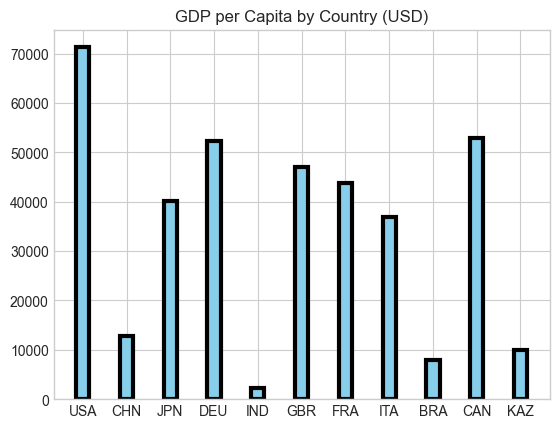

In [114]:
plt.bar(df_final.reset_index()['country_code'], df_final['gdp_per_capita($)'], color='skyblue', width=0.3, edgecolor='black', lw=3)
plt.title('GDP per Capita by Country (USD)')
plt.show()

# Heatmap (correlation between indicators)

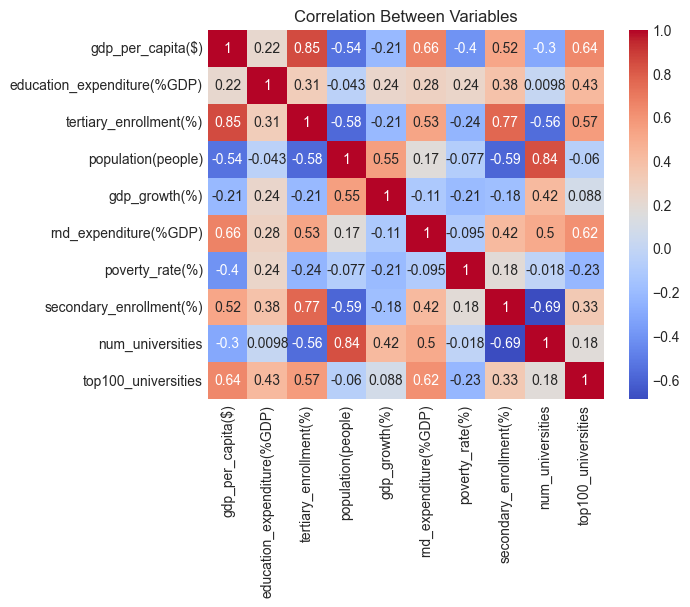

In [115]:
sns.heatmap(df_final.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Between Variables")
plt.show()


# GDP per Capita vs. Number of Universities

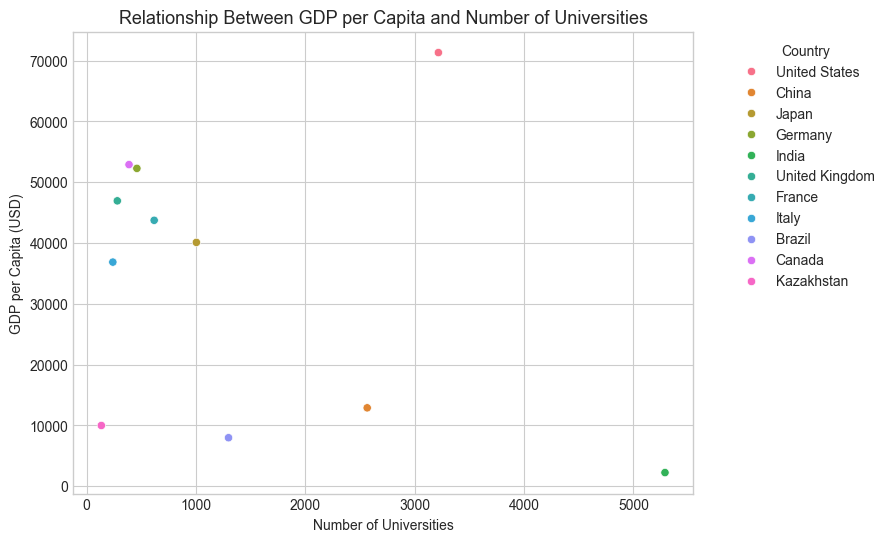

In [121]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_final,
    x="num_universities",
    y="gdp_per_capita($)",
    hue="country",
)
plt.title("Relationship Between GDP per Capita and Number of Universities", fontsize=13)
plt.xlabel("Number of Universities")
plt.ylabel("GDP per Capita (USD)")
plt.legend(title="Country", loc='upper left',  bbox_to_anchor=(1.05, 1))
plt.show()

# Pie Chart


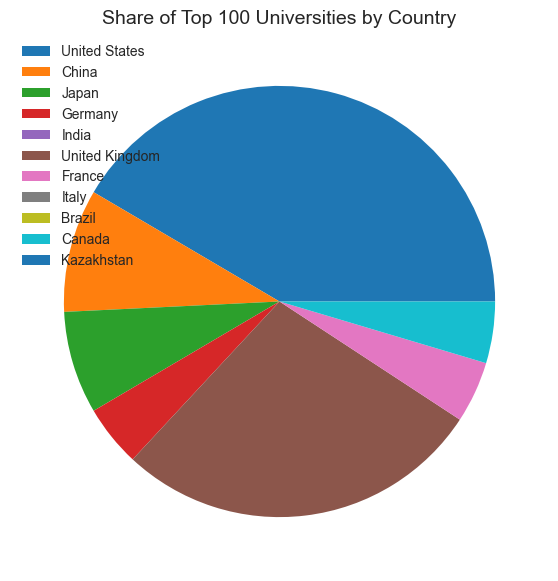

In [135]:
plt.figure(figsize=(7, 7))
plt.pie(df_final['top100_universities'])
plt.legend(labels=df_final['country'], loc='upper left')
plt.title("Share of Top 100 Universities by Country", fontsize=14)

plt.show()